In [73]:
import matplotlib.pyplot as plt
import numpy as np

Regression
==========


Supervised learning regression is a subfield of machine learning where the goal is to build a model that can predict continuous numeric values based on input data. In this approach, the algorithm is "supervised" because it learns from a labeled dataset, where the input features (also known as independent variables) are paired with corresponding output labels (also known as dependent variables).

The primary objective of regression is to **find a function that best fits the relationship between the input features and the target output**. The model aims to minimize the difference between its predicted values and the actual target values during the training process.

Commonly used regression algorithms include Linear Regression, Decision Tree Regression, Support Vector Regression, and Random Forest Regression. The choice of algorithm depends on the nature of the data and the complexity of the relationship between the features and the target variable.



We will start with a very simple toy example. We will create a dataset out of a sinus curve with some noise:

In [74]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [75]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

Then we visualise our data:

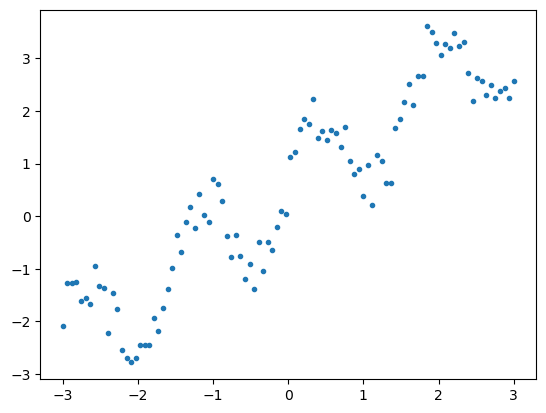

In [76]:
plt.plot(x, y, 'o', markersize=3)
plt.show()

Linear Regression
=================
One of the simplest models is a linear one, that simply tries to predict the data as lying on a line. 

One way to find such a line is LinearRegression (also known as ordinary least squares method).
The interface for LinearRegression is exactly the same as for the classifiers we have seen earlier, with the only difference that ``y`` now contains float values, instead of classes.

To apply a scikit-learn model, we need to reshape X into a 2d-array.
We do so by adding a second dimension, which is empty

In [77]:
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

(100,)
(100, 1)


We use `train_test_split`to split our data in a training and a test set again:

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

Then we can build our regression model:

In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

And predict. First let us try the training set:

In [80]:
y_pred_train = regressor.predict(X_train)

We can now plot the predictions of our model along the original data, to visualise how good these predictions are. 


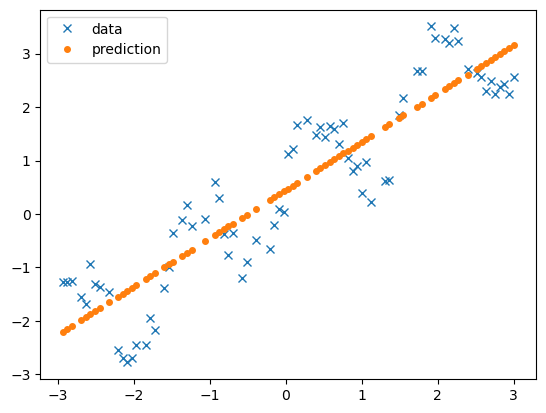

In [81]:
plt.plot(X_train, y_train, 'x', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction", markersize=4)
plt.legend(loc='best')
plt.show()

As you can see, the line is able to capture the general slope of the data, but not many details.

Let's now try the test set:

In [82]:
y_pred_test = regressor.predict(X_test)

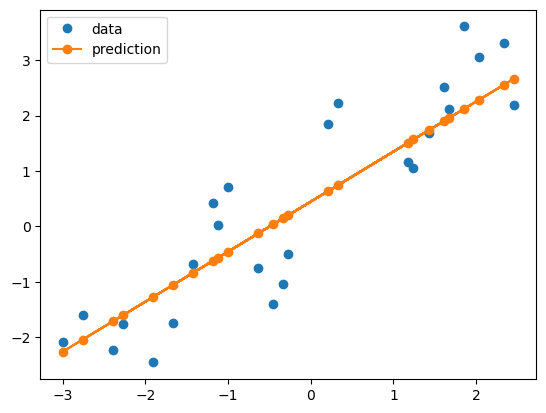

In [83]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o-', label="prediction")
plt.legend(loc='best')
plt.show()

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. 

For regression tasks, this is the **R2 score**:

$$ R^2 = 1 - \frac{\sum_{i} (y_i - f_i)^2}{\sum_i (y_i - \hat{y})^2} \text{ where } \hat{y} = \frac{1}{n}\sum_i^n y_i$$

Another popular way would be the **mean squared error**.

In [84]:
regressor.score(X_train, y_train)

0.8189190775347295

In [85]:
regressor.score(X_test, y_test)

0.7994321405079685

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
mean_squared_error(y_test, y_pred_test)

0.7056695020009783

KNeighborsRegression
=======================


As for classification, we can also use a neighbor based method for regression. 

We can simply take the output of the nearest point, or we could average several nearest points. 

This method is less popular for regression than for classification, but still a good baseline.

In [88]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

Again, let us look at the behavior on training and test set:

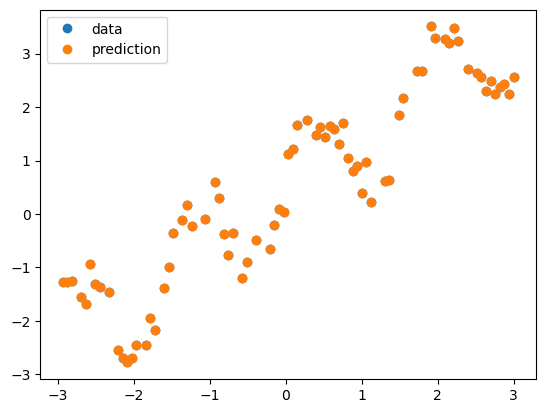

In [89]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

In [90]:
kneighbor_regression.score(X_train, y_train)

1.0

On the training set, we do a perfect job: each point is its own nearest neighbor!

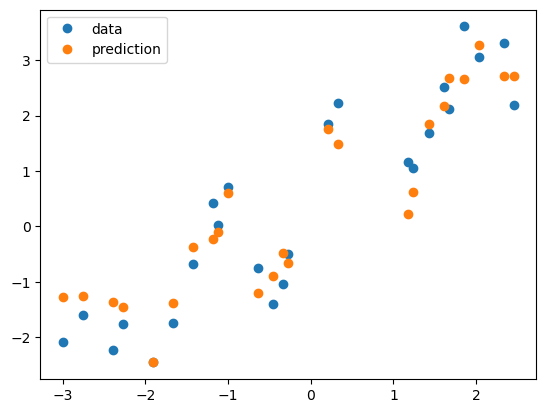

In [93]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')
plt.show()

On the test set, we also do a better job of capturing the variation, but our estimates look much more messy than before.
Let us look at the R2 score:

In [94]:
kneighbor_regression.score(X_test, y_test)

0.9232430746637266

In [95]:
mean_squared_error(y_test, y_pred_test)

0.2700583304541189

Much better than before! Here, the linear model was not a good fit to our problem.

Exercise
=========
Compare the KNeighborsRegressor, LinearRegression and Random Forest regression on the California housing dataset. You can load the dataset using ``fetch_california_housing``.

In a housing price prediction scenario, the input features might include factors like the area of the house, number of bedrooms, and location, while the target output would be the actual price of the house. The regression algorithm will learn from historical data with known prices to make accurate predictions for new houses.


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a regression model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_score = mean_squared_error(y_train, y_train_pred)
    test_score = mean_squared_error(y_test, y_test_pred)
    return train_score, test_score, y_test_pred

# Initialize and train the regression models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
knr = KNeighborsRegressor()
linear_reg_train_score, linear_reg_test_score, linear_reg_y_test_pred = train_and_evaluate_model(linear_reg, X_train, X_test, y_train, y_test)
rf_reg_train_score, rf_reg_test_score, rf_reg_y_test_pred = train_and_evaluate_model(rf_reg, X_train, X_test, y_train, y_test)
kn_reg_train_score, kn_reg_test_score, kn_reg_y_test_pred = train_and_evaluate_model(knr, X_train, X_test, y_train, y_test)

print("Linear Regression - Train MSE:", linear_reg_train_score)
print("Linear Regression - Test MSE:", linear_reg_test_score)
print("Random Forest Regression - Train MSE:", rf_reg_train_score)
print("Random Forest Regression - Test MSE:", rf_reg_test_score)
print("KNeighbor Regression - Train MSE:", kn_reg_train_score)
print("KNeighbor Regression - Test MSE:", kn_reg_test_score)


Linear Regression - Train MSE: 0.5179331255246697
Linear Regression - Test MSE: 0.5558915986952422
Random Forest Regression - Train MSE: 0.035327529696893685
Random Forest Regression - Test MSE: 0.2553684927247781
KNeighbor Regression - Train MSE: 0.7313176279775753
KNeighbor Regression - Test MSE: 1.1186823858768293


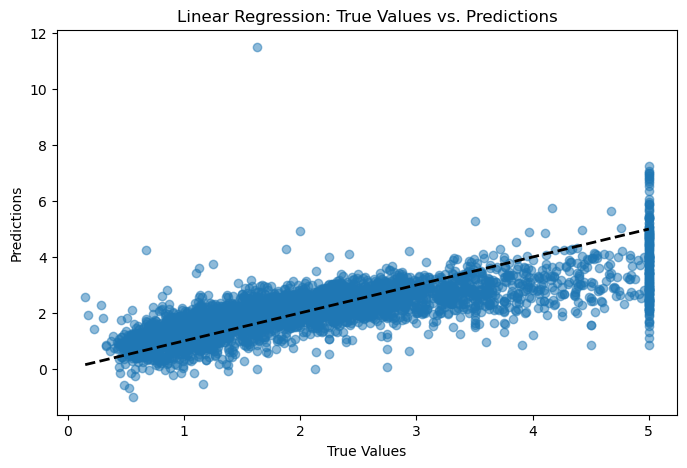

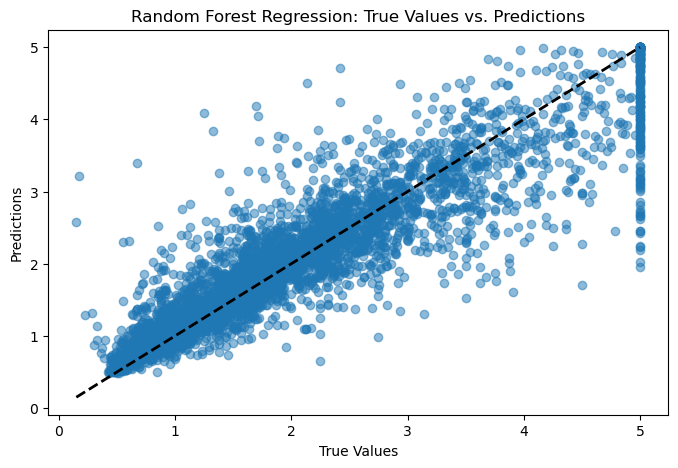

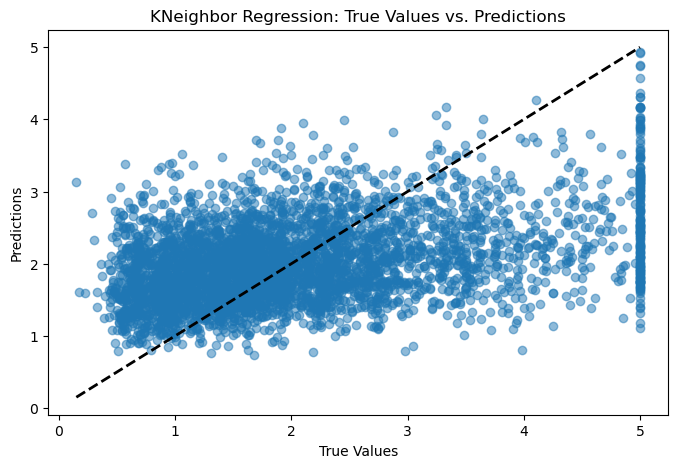

In [98]:

# Visualize the results for Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, linear_reg_y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True Values vs. Predictions')
plt.show()

# Visualize the results for Random Forest Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_reg_y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression: True Values vs. Predictions')
plt.show()


# Visualize the results for KNeighbor Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, kn_reg_y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNeighbor Regression: True Values vs. Predictions')
plt.show()

### Homework Exercise: Fuel Efficiency Prediction

Objective:
The objective of this exercise is to build a regression model that can predict the fuel efficiency (miles per gallon - mpg) of cars based on their attributes.

Data:
You can use the "auto-mpg" dataset available in Scikit-learn, which contains various features of different car models, such as cylinders, horsepower, weight, and acceleration, along with their corresponding fuel efficiency (mpg).

Steps:

Load the auto-mpg dataset from Scikit-learn.
Explore the data to understand its structure, features, and summary statistics.
Preprocess the data if necessary (e.g., handling missing values).
Split the data into training and test sets.
Choose a regression algorithm (e.g., Linear Regression, Decision Trees, or Random Forests) and create a model using Scikit-learn.
Train the model using the training data.
Evaluate the model's performance on the test data using appropriate regression metrics like Mean Squared Error (MSE) or R-squared (R2).
Experiment with different hyperparameters and algorithms to see how the model's performance changes.
Challenge:
For an extra challenge, try to implement and evaluate multiple regression algorithms to compare their performance.

Hints:

Use the train_test_split function from Scikit-learn to split the dataset into training and test sets.
Create a model using the chosen regression algorithm, fit it to the training data, and then use it to predict the fuel efficiency for the test data.
Use regression metrics like mean_squared_error or r2_score from Scikit-learn to evaluate the model's performance on the test data.